# PUMP IT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

np.random.seed(69572)

%matplotlib inline

# plt.figure(figsize=(120,10))

In [3]:
RAW_X = pd.read_csv('data/traning_set_values.csv', index_col='id')
y = pd.read_csv('data/training_set_labels.csv', index_col='id')
test_submission = pd.read_csv('data/test_set_values.csv', index_col='id')

## Pre Processing

In [5]:
from collections import defaultdict
from sklearn import preprocessing

# http://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
d = defaultdict(preprocessing.LabelEncoder)

# Encode
sam = pd.concat([RAW_X, test_submission]).fillna('').apply(lambda x: d[x.name].fit(x))

# DE-Encoding the variable
X = RAW_X.apply(lambda x: d[x.name].transform(x))

# DE-Encoding the variable
test_submission = test_submission.apply(lambda x: d[x.name].transform(x))

#
le = preprocessing.LabelEncoder().fit(y)
y = le.transform(y)

TypeError: ('unorderable types: str() > bool()', 'occurred at index public_meeting')

In [5]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/Users/sampathkumarm/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


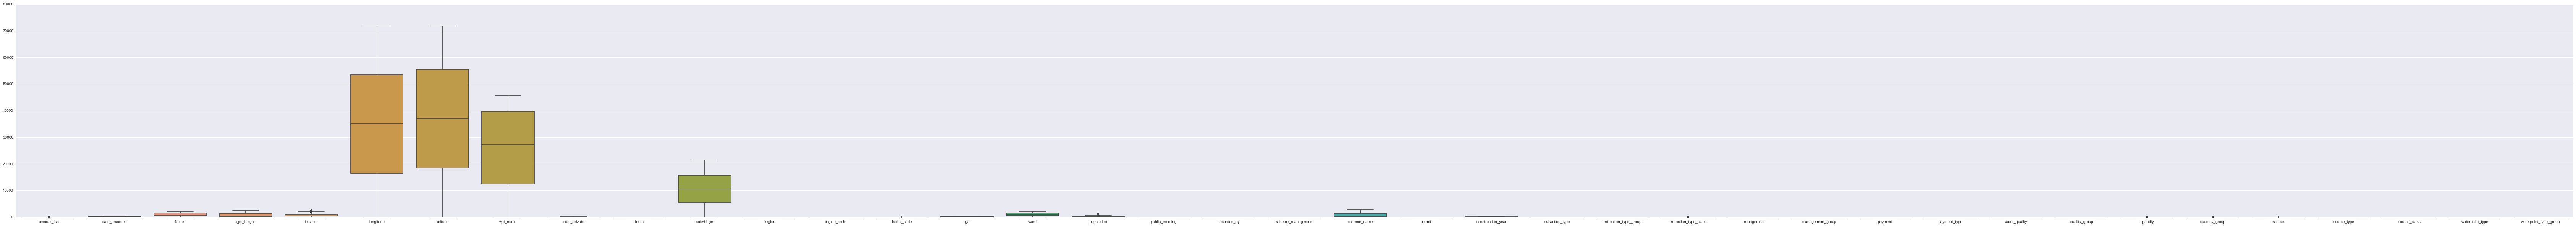

In [6]:
# X_train.boxplot()
plt.figure(figsize=(120,10))
sb.boxplot(X_train)

# Benchmark

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [11]:
clf = clf.fit(X_train, y_train.ravel())

In [12]:
pred = clf.predict_proba(X_test)

In [13]:
clf.feature_importances_

array([ 0.01817919,  0.04586521,  0.02896387,  0.04322192,  0.02378664,
        0.08055895,  0.07262677,  0.05747121,  0.00090434,  0.01173375,
        0.05400999,  0.014145  ,  0.01393644,  0.01359146,  0.02208535,
        0.03647804,  0.03049605,  0.00640902,  0.        ,  0.01205268,
        0.02108508,  0.00693976,  0.03412581,  0.01129394,  0.01239011,
        0.01680851,  0.01117927,  0.00658806,  0.01582936,  0.01386385,
        0.00949883,  0.00839125,  0.07804331,  0.05666286,  0.01216435,
        0.01292436,  0.00398879,  0.0583051 ,  0.02340152])

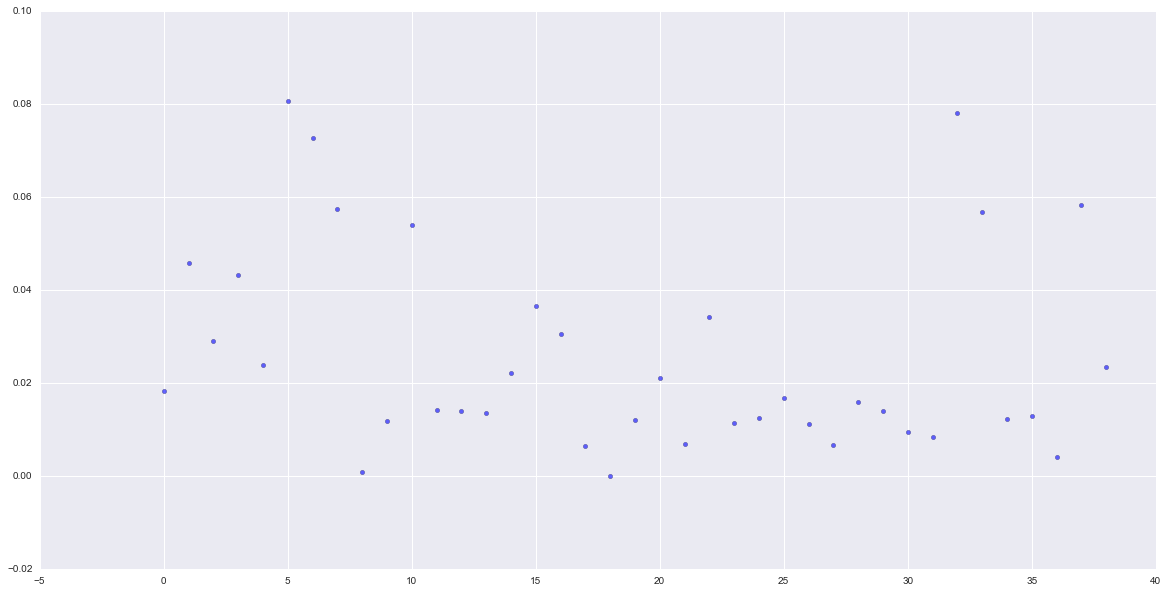

In [14]:
plt.figure(figsize=(20,10))

ax = plt.scatter(range(len(clf.feature_importances_)), clf.feature_importances_, alpha=0.6)


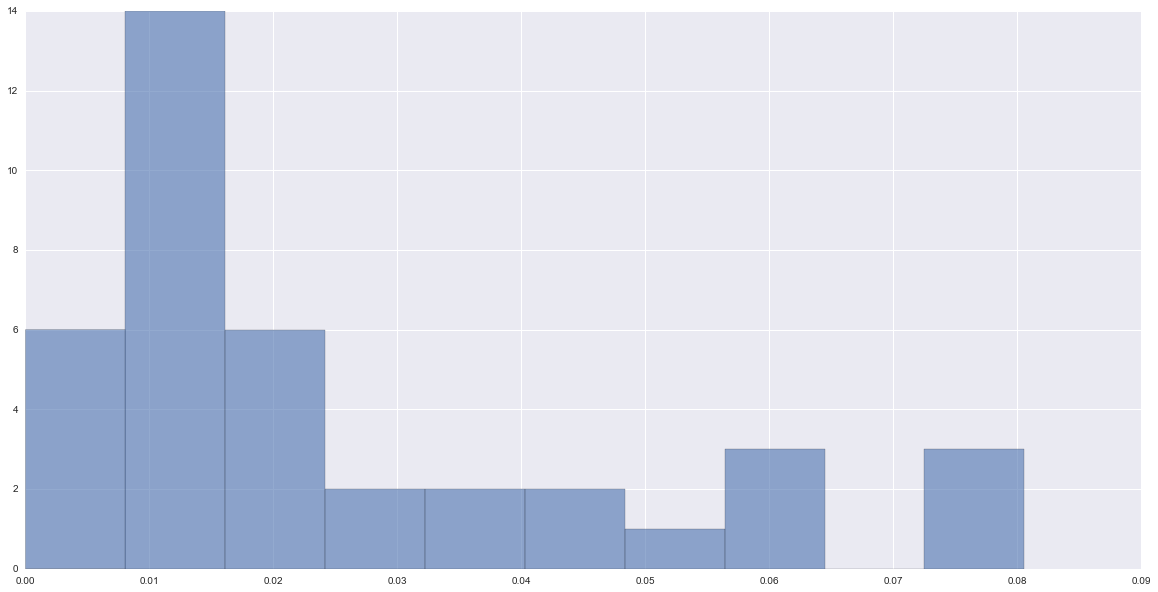

In [15]:
plt.figure(figsize=(20,10))

ax = plt.hist (clf.feature_importances_, alpha=0.6)

In [16]:
# len(pred)

clf.score(X_test, y_test) # 0.79303132333435367

0.79655137230894801

In [17]:
test_ids = test_submission.index

In [18]:
test_submission.head(2)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
50785,0,292,346,2056,427,37615,47050,2669,0,0,...,2,6,2,3,3,5,3,1,6,5
51630,0,292,508,1629,443,46953,56240,7473,0,5,...,2,6,2,2,2,8,6,0,1,1


In [19]:
# predictions = clf.predict_proba(test_submission)
predictions = clf.predict(test_submission)
print (predictions.shape)
predictions_labels = le.inverse_transform(predictions)
# sub = pd.DataFrame(predictions, columns=list(le.classes_))
sub = pd.DataFrame(predictions_labels, columns=['status_group'])
sub.head()

(14850,)


,status_group
0,non functional
1,functional
2,non functional
3,non functional
4,functional


In [20]:
sub.insert(0, 'id', test_ids)
sub.reset_index()
sub.to_csv('submit.csv', index = False)
sub.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional


In [21]:
predictions = clf.predict(test_submission)

predictions

array([2, 0, 2, ..., 0, 0, 2])